In [1]:
import re
import sys
import pandas as pd
import matplotlib.pylab as plt
import time
import datetime
import numpy as np
dt = datetime.datetime.now()


class DNA(object):
    def __init__(self, seq):
        self.seq = seq
        self.A = seq.count('A')
        self.T = seq.count('T')
        self.G = seq.count('G')
        self.C = seq.count('C')
        
    
    def count_base(self):
        baseCount =[self.A,self.T, self.G, self.C]
        obj = pd.DataFrame(baseCount,['A','T','G','C'],['개수'])
        Base = ('A', 'G', 'T', 'C')
        y_pos = np.arange(len(baseCount))

        plt.barh(y_pos, baseCount, align='center', alpha=0.6)
        plt.yticks(y_pos, Base)
        plt.xlabel('Number')
        plt.title('Base Number')
        plt.show()
        
        return obj
    
    def GCcontent(self):
        GC = (self.G + self.C) / (self.A+ self.T + self.G + self.C) *100
        obj = pd.DataFrame(GC, ['GC content'], ['%'])
        return obj
        
    
class DNAException(Exception):
    def __init__(self, msg):
        self._message = msg

def input_seq():
    DNA_seq = input("DNA 염기서열을 입력하시오:")
    p = re.compile('(A|G|T|C)*$')
    
    if p.match(str(DNA_seq)):
        return DNA_seq
    else:
        raise DNAException("입력값 ERROR!!! : A, G, T, C 이외의 문자를 입력했습니다.")

def checkTime(func):
    def new_func(*args, **kwargs):
        print("\n[{time}]".format(time=dt.strftime("%Y-%m-%d %H:%M")))
        start_time = time.time()
        func(*args, **kwargs)
        end_time = time.time()
        print("실행시간은: {time}".format(time=end_time-start_time))
    return new_func

@checkTime
def translate(seq):
    print("-------------------------번역 시작---------------------------")
    table = {
            'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M', 
            'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T', 
            'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K', 
            'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
            'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L', 
            'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P', 
            'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q', 
            'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R', 
            'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V', 
            'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A', 
            'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E', 
            'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G', 
            'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S', 
            'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L', 
            'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_', 
            'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
        } 
    protein1 =""
    protein2 =""
    protein3 =""
        
    N = len(seq) % 3
        
    if N == 0:
        for i in range(0,len(seq), 3):
                codon = seq[i:i + 3]
                protein1 += table[codon] 
        for i in range(1, len(seq)-2, 3):
                codon = seq[i:i + 3]
                protein2 += table[codon]
        for i in range(2, len(seq)-2, 3):
                codon = seq[i:i + 3]
                protein3 += table[codon]
        
    elif N == 1:
        for i in range(0,len(seq)-1, 3):
                codon = seq[i:i + 3]
                protein1 += table[codon] 
        for i in range(1, len(seq)-3, 3):
                codon = seq[i:i + 3]
                protein2 += table[codon]
        for i in range(2, len(seq)-3, 3):
                codon = seq[i:i + 3]
                protein3 += table[codon]
         
    elif N == 2:
        for i in range(0,len(seq)-2, 3):
                codon = seq[i:i + 3]
                protein1 += table[codon] 
        for i in range(1, len(seq)-4, 3):
                codon = seq[i:i + 3]
                protein2 += table[codon]
        for i in range(2, len(seq)-4, 3):
                codon = seq[i:i + 3]
                protein3 += table[codon]
        
     #정규 표현식을 이용해서 개시코돈(ATG = "M")로 시작하고 종결코돈(TAG,TAA,TGA = "_" )끝나는 Open Reaading Frame만 추출
    print("\nDNA 염기서열이 암호화하는 아미노산 서열은 다음과 같습니다.")
    print("1. 첫번째 염기부터 읽을 때")
    print(protein1+"\n")
    print("번역후 생성되는 단백질 서열")
    print(re.findall('(M[A-Z]+_)',protein1))
    print("\n")
    print("2. 두번째 염기부터 읽을 때")
    print(protein2+"\n")
    print("번역후 생성되는 단백질 서열")
    print(re.findall('(M[A-Z]+_)',protein2))
    print("\n")
    print("3. 세번째 염기부터 읽을 때")
    print(protein3+"\n")
    print("번역후 생성되는 단백질 서열")
    print(re.findall('(M[A-Z]+_*)',protein3))
    print("\n")
       
        
    print("-------------------------번역 완료---------------------------")
        

if __name__ == "__main__":
    try:
        seq = input_seq()
    except DNAException as d:
        print(d.args[0])
        sys.exit()
    else:
        dna1 = DNA(seq)
        
    
    translate(dna1.seq) #번역


DNA 염기서열을 입력하시오:AGAACCGCAAGATGCGACGGTGTACAAGTAATTGTCAACAGACCATCGTGTTTTCATAATGGTACCAGGATCTTCAAGCCGTGTCAATCAAGCTCGGATTACGGTGTTTACTCCGTCCTGCGGTTACTCACGGTCTGTAATCCACCTCAAGTCAAGCCATTGCCTCTCTGAGACGCCGCATGAATTAATACGTATACTTTGCGCGGGTTCACTGCGATCCGTTCAGAGTCGTCCAAGGGCACAATCGAGCTCCCATTTGTATGTTCGGCTAACTTGTACCCAACCCCCGAAGTTTAGCAGGTCGTGGGGTGTCATGGAGCCTCTGGTTCATCCCGTGGGATATCAAGCTTCGTCTTGATAAAGCTCCCCGCTCGGGTGTAGCAGAGAAGACGCCTACTGAATTGTGCGATCCCTGCACCTCAGCTAAGGTAGCTACCAATATTTAGTTTCTAAGCCTTGCGACAGACCTCCCACTTAGATTGCCACGCATAGAGCTAGCGAGTCAGCGAAAAGCATGACGCGCTTTCAAGCGTGGCGAGTATGTGAACCAAGGCTTCGGACAGGACTATATACTTAGGTTTGATCTCGCCCCGAGAACTGTAAACCTCAACATTTATAGATTATAAGGTTAGCCGAAAATGCACGTGGTGGCGCCCGCCGACTGCTCCCTGAGTGTGGCTCTTTGTTCTGTCAACGCCCGACCTTCATCGCGGCCGATTCCTTCTGCGGACCATGTCGTCCTGATACTTTGGCCATGTTTCCGTTGTAGGAGTGAAGCCACTTGGCTTTGCGCCGTAGTTCCAATGAAAAACCTATGGACTTTGTTTAGGGTAGCATCAGGAATCTGAACCCTCAGAAAGTGGGGATCCCGGGTATAGACCTTTATCTGCGGTTCAAGTTAGGCATAAGGCTGCATGCTACCTTGTCACACCTACACTGCTCGAAGTAAATATGGGAAGCGTGCGACCTGGCTCCAGGCGTTCC

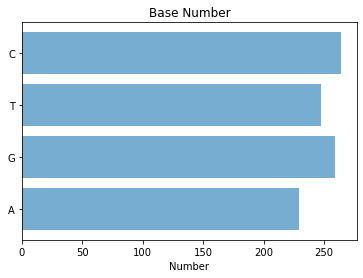

,개수
A,229
T,259
G,248
C,264


In [2]:
dna1.count_base()

In [3]:
dna1.GCcontent()

,%
GC content,51.2
